In [ ]:
import time
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
X_train = x_train
X_test = x_test
Y_train = y_train 
Y_test = y_test

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
noofclasses = 10
def y_train_categorical(Y_train,numberofclasses):
  Y_train = np_utils.to_categorical(Y_train,numberofclasses)
  return Y_train
def y_test_categorical(Y_test,numberofclasses):
  Y_test = np_utils.to_categorical(Y_test,numberofclasses)
  return Y_test
Y_train = y_train_categorical(Y_train,10)
Y_test = y_test_categorical(Y_test,10)


In [ ]:
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
X_train /= 255
X_test /= 255

# **NO NORMALIZATION**

In [ ]:
def base_model():
    model = Sequential()
    model.add(ZeroPadding2D(1))
    model.add(Conv2D(32, (3, 3),padding='valid' ,activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    sgd = SGD(lr = 0.01, decay=1e-6, momentum=0.9 ,nesterov=True)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer = sgd)
    return model
cnn_n = base_model()

cnn = cnn_n.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=2, validation_split=0.2)
cnn_n.summary()

Epoch 1/20
1250/1250 - 29s - loss: 1.6049 - accuracy: 0.4316 - val_loss: 1.4052 - val_accuracy: 0.5095
Epoch 2/20
1250/1250 - 29s - loss: 1.3253 - accuracy: 0.5377 - val_loss: 1.3165 - val_accuracy: 0.5402
Epoch 3/20
1250/1250 - 28s - loss: 1.2237 - accuracy: 0.5745 - val_loss: 1.2555 - val_accuracy: 0.5622
Epoch 4/20
1250/1250 - 28s - loss: 1.1455 - accuracy: 0.6022 - val_loss: 1.1766 - val_accuracy: 0.5983
Epoch 5/20
1250/1250 - 28s - loss: 1.0848 - accuracy: 0.6242 - val_loss: 1.1898 - val_accuracy: 0.5961
Epoch 6/20
1250/1250 - 28s - loss: 1.0551 - accuracy: 0.6345 - val_loss: 1.2141 - val_accuracy: 0.5903
Epoch 7/20
1250/1250 - 28s - loss: 1.0265 - accuracy: 0.6457 - val_loss: 1.1778 - val_accuracy: 0.6035
Epoch 8/20
1250/1250 - 28s - loss: 1.0060 - accuracy: 0.6498 - val_loss: 1.1692 - val_accuracy: 0.6032
Epoch 9/20
1250/1250 - 28s - loss: 0.9940 - accuracy: 0.6555 - val_loss: 1.2296 - val_accuracy: 0.5938
Epoch 10/20
1250/1250 - 28s - loss: 0.9761 - accuracy: 0.6625 - val_loss:

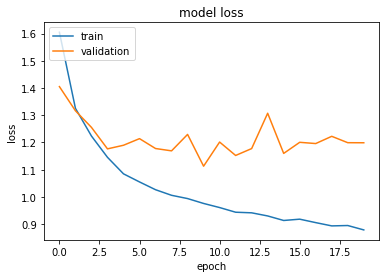

In [ ]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
plotLosses(cnn)    

In [ ]:
score = cnn_n.evaluate(X_test, Y_test, batch_size=128, verbose=0)

In [ ]:
print(cnn_n.metrics_names)
print(score)

['loss', 'accuracy']
[1.2067973613739014, 0.6071000099182129]


# **2 DENSE LAYERS**

In [ ]:
def base_model():
    model = Sequential()
    model.add(ZeroPadding2D(1))
    model.add(Conv2D(32, (3, 3),padding = 'valid', activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.15))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    sgd = SGD(lr = 0.01, decay=1e-6, momentum=0.9 ,nesterov=True)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer = sgd)
    return model
cnn_n = base_model()
cnn = cnn_n.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=2, validation_split=0.2)
cnn_n.summary()

Epoch 1/20
1250/1250 - 41s - loss: 1.6395 - accuracy: 0.4018 - val_loss: 1.4853 - val_accuracy: 0.4592
Epoch 2/20
1250/1250 - 40s - loss: 1.3010 - accuracy: 0.5358 - val_loss: 1.2882 - val_accuracy: 0.5441
Epoch 3/20
1250/1250 - 40s - loss: 1.1856 - accuracy: 0.5834 - val_loss: 1.5093 - val_accuracy: 0.4651
Epoch 4/20
1250/1250 - 40s - loss: 1.1031 - accuracy: 0.6123 - val_loss: 1.3523 - val_accuracy: 0.5457
Epoch 5/20
1250/1250 - 39s - loss: 1.0461 - accuracy: 0.6369 - val_loss: 1.2978 - val_accuracy: 0.5637
Epoch 6/20
1250/1250 - 40s - loss: 0.9957 - accuracy: 0.6545 - val_loss: 1.2229 - val_accuracy: 0.5886
Epoch 7/20
1250/1250 - 40s - loss: 0.9452 - accuracy: 0.6694 - val_loss: 1.3069 - val_accuracy: 0.5698
Epoch 8/20
1250/1250 - 39s - loss: 0.9079 - accuracy: 0.6844 - val_loss: 1.2100 - val_accuracy: 0.5989
Epoch 9/20
1250/1250 - 40s - loss: 0.8683 - accuracy: 0.6948 - val_loss: 1.6748 - val_accuracy: 0.4962
Epoch 10/20
1250/1250 - 40s - loss: 0.8220 - accuracy: 0.7125 - val_loss:

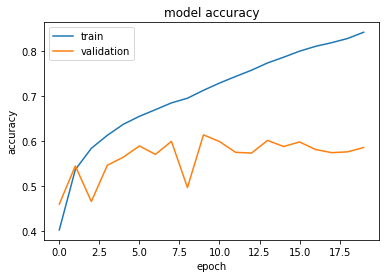

In [ ]:
def plotLosses(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
plotLosses(cnn)    

In [ ]:
score = cnn_n.evaluate(X_test, Y_test, batch_size=128, verbose=0)

In [ ]:
print(cnn_n.metrics_names)
print(score)

['loss', 'accuracy']
[2.021829605102539, 0.571399986743927]


# **2 blocks of Conv2d,Maxpooling2d**

In [ ]:
def base_model():
    model = Sequential()
    model.add(ZeroPadding2D(1))
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64))
    #model.add(Dropout(0.50))
    model.add(Dense(10, activation='softmax'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
    return model
cnn_n = base_model()
cnn = cnn_n.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=2, validation_split=0.2)
cnn_n.summary()

Epoch 1/20
1250/1250 - 63s - loss: 1.5815 - accuracy: 0.4618 - val_loss: 1.2806 - val_accuracy: 0.5495
Epoch 2/20
1250/1250 - 62s - loss: 1.1655 - accuracy: 0.5884 - val_loss: 1.3977 - val_accuracy: 0.5203
Epoch 3/20
1250/1250 - 62s - loss: 1.0490 - accuracy: 0.6343 - val_loss: 1.2227 - val_accuracy: 0.5781
Epoch 4/20
1250/1250 - 62s - loss: 0.9794 - accuracy: 0.6603 - val_loss: 1.1726 - val_accuracy: 0.5955
Epoch 5/20
1250/1250 - 62s - loss: 0.9247 - accuracy: 0.6775 - val_loss: 1.0258 - val_accuracy: 0.6527
Epoch 6/20
1250/1250 - 63s - loss: 0.8788 - accuracy: 0.6964 - val_loss: 1.1986 - val_accuracy: 0.5759
Epoch 7/20
1250/1250 - 62s - loss: 0.8445 - accuracy: 0.7074 - val_loss: 1.1426 - val_accuracy: 0.6155
Epoch 8/20
1250/1250 - 62s - loss: 0.8098 - accuracy: 0.7207 - val_loss: 1.0181 - val_accuracy: 0.6612
Epoch 9/20
1250/1250 - 62s - loss: 0.7778 - accuracy: 0.7280 - val_loss: 1.2008 - val_accuracy: 0.6223
Epoch 10/20
1250/1250 - 62s - loss: 0.7534 - accuracy: 0.7382 - val_loss:

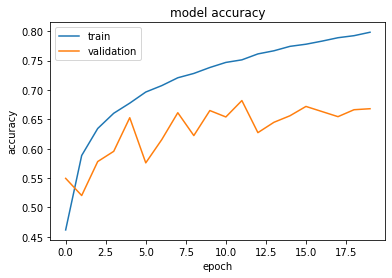

In [ ]:
def plotLosses(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
plotLosses(cnn)    

In [ ]:
score = cnn_n.evaluate(X_test, Y_test, batch_size=128, verbose=0)

In [ ]:
print(cnn_n.metrics_names)
print(score)

['loss', 'accuracy']
[1.1616158485412598, 0.6547999978065491]


# **3 BLOCKS OF MAXPOOL2D,CONV2D**

In [ ]:
def base_model():
    model = Sequential()
    model.add(ZeroPadding2D(1))
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256))
    #model.add(Dropout(0.50))
    model.add(Dense(64))
    model.add(Dense(10, activation='softmax'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
    return model
cnn_n = base_model()
cnn = cnn_n.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=2, validation_split=0.2)
cnn_n.summary()

Epoch 1/20
1250/1250 - 94s - loss: 1.5905 - accuracy: 0.4460 - val_loss: 1.3551 - val_accuracy: 0.5132
Epoch 2/20
1250/1250 - 95s - loss: 1.1718 - accuracy: 0.5876 - val_loss: 1.1438 - val_accuracy: 0.6150
Epoch 3/20
1250/1250 - 95s - loss: 0.9933 - accuracy: 0.6559 - val_loss: 1.0256 - val_accuracy: 0.6491
Epoch 4/20
1250/1250 - 94s - loss: 0.8627 - accuracy: 0.7014 - val_loss: 1.0884 - val_accuracy: 0.6313
Epoch 5/20
1250/1250 - 94s - loss: 0.7583 - accuracy: 0.7384 - val_loss: 1.0649 - val_accuracy: 0.6666
Epoch 6/20
1250/1250 - 95s - loss: 0.6790 - accuracy: 0.7638 - val_loss: 1.0594 - val_accuracy: 0.6614
Epoch 7/20
1250/1250 - 95s - loss: 0.6042 - accuracy: 0.7902 - val_loss: 1.0124 - val_accuracy: 0.6758
Epoch 8/20
1250/1250 - 95s - loss: 0.5342 - accuracy: 0.8127 - val_loss: 1.0685 - val_accuracy: 0.6818
Epoch 9/20
1250/1250 - 95s - loss: 0.4770 - accuracy: 0.8317 - val_loss: 1.1081 - val_accuracy: 0.6538
Epoch 10/20
1250/1250 - 95s - loss: 0.4196 - accuracy: 0.8508 - val_loss:

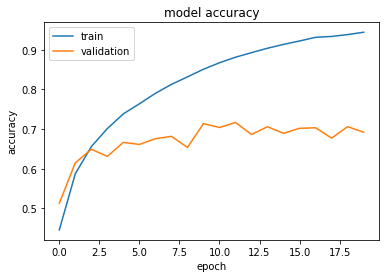

In [ ]:
def plotLosses(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
plotLosses(cnn)    

In [ ]:
score = cnn_n.evaluate(X_test, Y_test, batch_size=128, verbose=0)

In [ ]:
print(cnn_n.metrics_names)
print(score)

['loss', 'accuracy']
[1.6383074522018433, 0.6876000165939331]


# **3 LAYERS HAS MAXIMUM ACCURACY HENCE WE SAVE THAT**

In [ ]:
cnn_n.save("mymodel")

INFO:tensorflow:Assets written to: mymodel/assets


# **ACCURACIES**

**THESE ARE THE FOLLOWING ACCURACIES OF THE MODELS**
- **SINGLE LAYER - 0.613**
- **DOUBLE DENSE LAYER - 0.63**
- **2 LAYERS OF CONV2D,NORMALIZATION,MAXPOOL - 0.68**
- **3 LAYERS OF CONV2D,NORM,MAXPOOL - 0.73**


In [2]:
import pandas as pd
data = {'Model Name' :['Single Layer','Double Dense Layer','2 layers of Conv2D,Maxpool2d','3 layers of Conv2D,Maxpool2d'],
        'Accuracy' : [0.613,0.63,0.68,0.73],
        'Time Taken in seconds': [580,820,1260,1880]}
df = pd.DataFrame(data, index =['1',
                                '2',
                                '3',
                                '4'])

In [3]:
df

,Model Name,Accuracy,Time Taken in seconds
1,Single Layer,0.613,580
2,Double Dense Layer,0.630,820
3,"2 layers of Conv2D,Maxpool2d",0.680,1260
4,"3 layers of Conv2D,Maxpool2d",0.730,1880
